In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

from transmitter import transmitter
from receiver import receiver

In [7]:
t = transmitter()

to_transmit = t.transmit("max_test_in.txt", playsound=False)

transmitted_bits = t.process_file("max_test_in.txt")

Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568
LDPC Encoding Length: 30712
LDPC Padding Length: 392
OFDM Encoding Length: 62208
OFDM Padding Length: 0
Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568
67568
386016


c:\Users\kmc07\OneDrive\Desktop\GF3_2\GF3\ldpc_jossy\transmitter.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  to_transmit[index]  = np.concatenate((cyclic_prefix, x), axis = None)


In [8]:
channel_response = np.loadtxt('../weekend_files/channel.csv', delimiter = ",", dtype = "float")

# Convolve w/ channel response
to_decode = to_transmit
to_decode = np.convolve(channel_response, to_transmit)
to_decode = to_decode[:-1 * len(channel_response) + 1]

# NOISE

for index, i in enumerate(to_decode):
    to_decode[index] = i + random.gauss(0.0, 0.0)

to_decode = np.concatenate((np.zeros(500), to_decode, np.zeros(500)))

In [9]:
def success(a, b):
    """find the percentage difference between two lists"""
    successes = 0

    for index, i in enumerate(a):
        if i == b[index]:
            successes += 1 / len(a)

    return successes

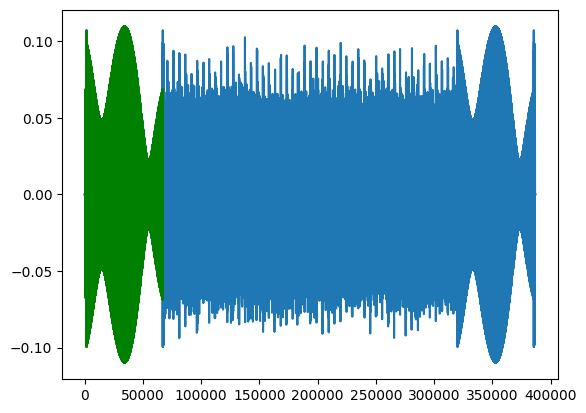

Chirp_p_s Prefix Length: 1024
Chirp_p_s Suffix Length: 1024
Chirp_p_s Length: 67568
387016
193508
68068
[1.        +0.j         1.09627137-0.00667279j 1.09608004-0.01334321j ...
 1.09576121+0.02000885j 1.09608004+0.01334321j 1.09627137+0.00667279j]
[ 7.11824878e-01-8.26704157e-19j -6.14201163e-02-4.15554364e-18j
 -1.47067122e-01+6.24771502e-18j ... -1.46916348e-04+2.59741091e-18j
  9.98776973e-05-2.46053352e-18j -1.46916348e-04+1.41436925e-19j]


c:\Users\kmc07\OneDrive\Desktop\GF3_2\GF3\.venv\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\kmc07\OneDrive\Desktop\GF3_2\GF3\.venv\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


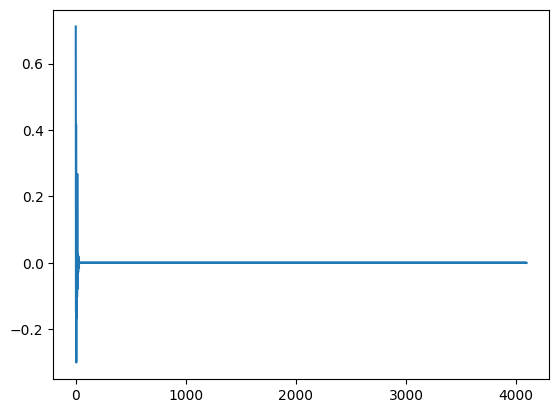

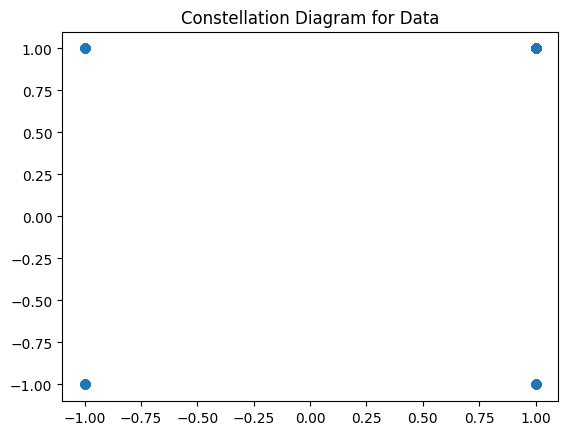

1524
1.0000000000003553
According to all known laws of aviation, there is no way a bee should be able to fly.Its wings are too small to get its fat little body off the ground.The bee, of course, flies anyway because bees don't care what humans think is impossible.Yellow, black. Yellow, black. Yellow, black. Yellow, black.Ooh, black and yellow!Let's shake it up a little.Barry! Breakfast is ready!Coming!Hang on a second.Hello?Barry?Adam?Can you believe this is happening?I can't.I'll pick you up.Looking sharp.Use the stairs, Your father paid good money for those.Sorry. I'm excited.Here's the graduate.We're very proud of you, son.A perfect report card, all B's.Very proud.Ma! I got a thing going here.You got lint on your fuzz.Ow! That's me!Wave to us! We'll be in row 118,000.Bye!Barry, I told you, stop flying in the house!Hey, Adam.Hey, Barry.Is that fuzz gel?A little. Special day, graduation.Never thought I'd make it.Three days grade school, three days high school.Those were awkward.Three 

In [10]:
plt.plot(to_decode)
plt.plot(to_decode[0:67043], color='green')
plt.show()

r = receiver()

r.set_bits_and_file_name(30712,'asdf')
print(len(to_decode))
r.entire_data = to_decode

binary_data = r.start()
print(r.data_index)
print(r.channel_freq)
check = r.channel_freq
check[0] = 1
check[2048] = 1
print(np.fft.ifft(check))
plt.plot(np.fft.ifft(check))
plt.show()
plt.scatter(r.constellations[0:500].real, r.constellations[0:500].imag)
plt.title("Constellation Diagram for Data")
plt.show()
print(r.chirp_start)

print(success(binary_data, transmitted_bits))
print(r.decode_text(binary_data))